In [381]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

sns.set(palette='muted')
style.use('ggplot')

In [382]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [383]:
# Add the # of words in each ad topic line.

def word_count(string):
    return string.count(" ") + 1

df['Line_Words'] = df['Ad Topic Line'].apply(lambda row: word_count(row))

In [384]:
# Add the length of each ad topic line.

def line_length(string):
    return len(string)

df['Line_Length'] = df['Ad Topic Line'].apply(lambda row: line_length(row))

In [385]:
# Change the Male category to 'Male' and 'Female'

def gender_label_encode(label):
    if label == 0:
        return 'Female'
    else: 
        return 'Male'
    
df['Gender Labeled'] = df['Male'].apply(lambda row: gender_label_encode(row))

In [386]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Line_Words,Line_Length,Gender Labeled
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,34,Female
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,3,34,Male
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,32,Female
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,3,37,Male
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,29,Female


In [387]:
y = df.loc[:, 'Clicked on Ad']

In [388]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
Line_Words                     4
Line_Length                   35
Gender Labeled                 2
dtype: int64

In [389]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)

nums.remove('Male') # Male fits better as a categorical variable.
nums.remove('Clicked on Ad') # This is the label.
nums.remove('Line_Words') # This is the label.
nums.remove('Line_Length') # This is the label.
nums.remove('Age')

cats.remove('Ad Topic Line') # This doesn't really give insights in terms of data science or data visualization.
cats.remove('Timestamp') # This is a unique value so this wouldn't give any insights either.
cats.remove('City') # This has a unique value for almost every row, so it won't give any new information.
cats.extend(['Line_Words', 'Line_Length', 'Age'])

In [390]:
print(f'cats: {cats}')
print(f'nums: {nums}')

cats: ['Country', 'Gender Labeled', 'Line_Words', 'Line_Length', 'Age']
nums: ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']


In [391]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
Line_Words                  0
Line_Length                 0
Gender Labeled              0
dtype: int64

In [392]:
df = pd.concat((df[cats], df[nums], df['Clicked on Ad']), axis=1)

In [393]:
df.head()

,Country,Gender Labeled,Line_Words,Line_Length,Age,Daily Time Spent on Site,Area Income,Daily Internet Usage,Clicked on Ad
0,Tunisia,Female,3,34,35,68.95,61833.90,256.09,0
1,Nauru,Male,3,34,31,80.23,68441.85,193.77,0
2,San Marino,Female,3,32,26,69.47,59785.94,236.50,0
3,Italy,Male,3,37,29,74.15,54806.18,245.89,0
4,Iceland,Female,3,29,35,68.37,73889.99,225.58,0


In [394]:
fontsize = 16

In [395]:
df_cats = df.loc[:, 'Country': 'Line_Length']
df_nums = df.loc[:, 'Daily Time Spent on Site': 'Daily Internet Usage']

# Categorical Analysis

In [396]:
df_cats.describe()

,Line_Words,Line_Length
count,1000.000000,1000.000000
mean,3.219000,33.394000
std,0.485051,5.741928
min,3.000000,17.000000
25%,3.000000,29.000000
50%,3.000000,33.000000
75%,3.000000,37.000000
max,6.000000,55.000000


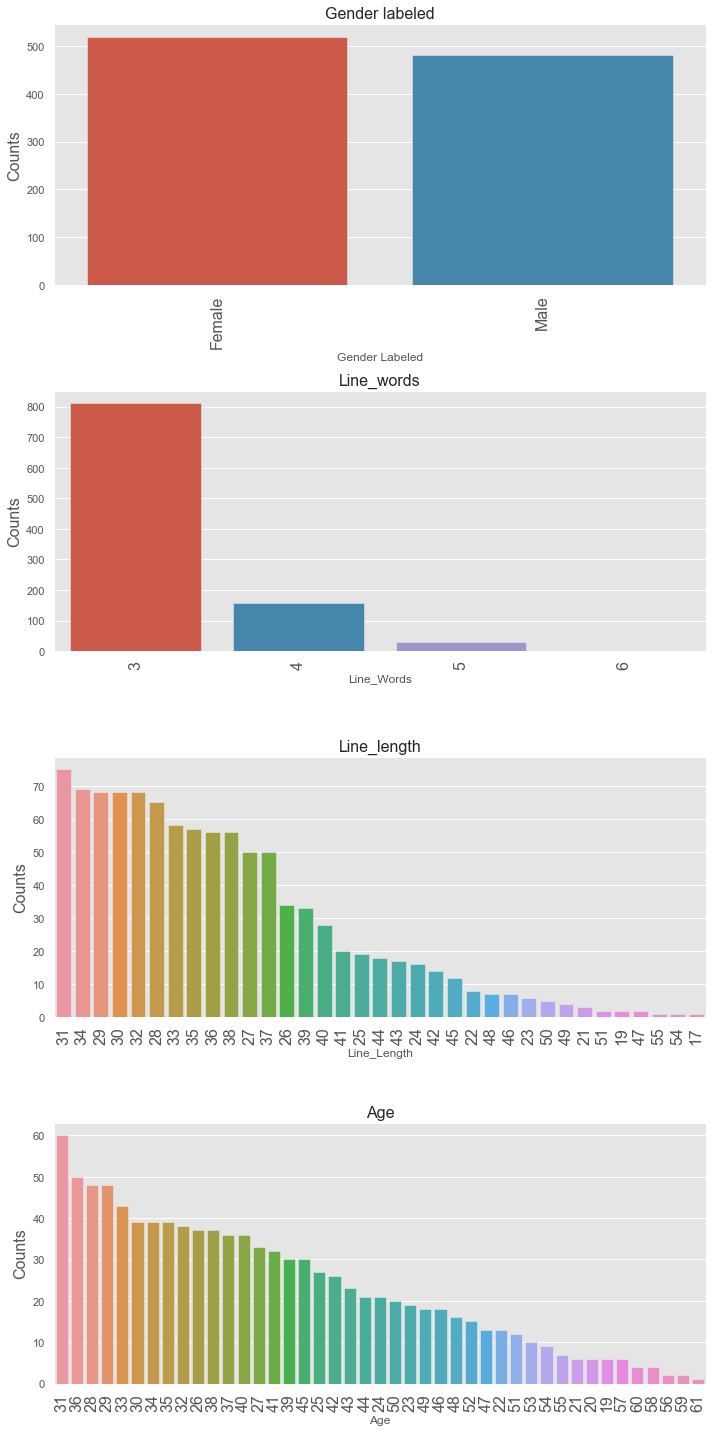

In [397]:
cats.remove('Country')

fig = plt.figure(1, figsize=(10, 20))
i = 0

for cat in cats:
    i += 1
    ax = plt.subplot(4, 1, i)
    
    sns.countplot(df[cat], order=df[cat].value_counts().index)
    
    ax.set_title(cat.capitalize(), fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)
    ax.set_ylabel('Counts', fontsize=fontsize)
    plt.tight_layout()

cats.extend(['Country'])

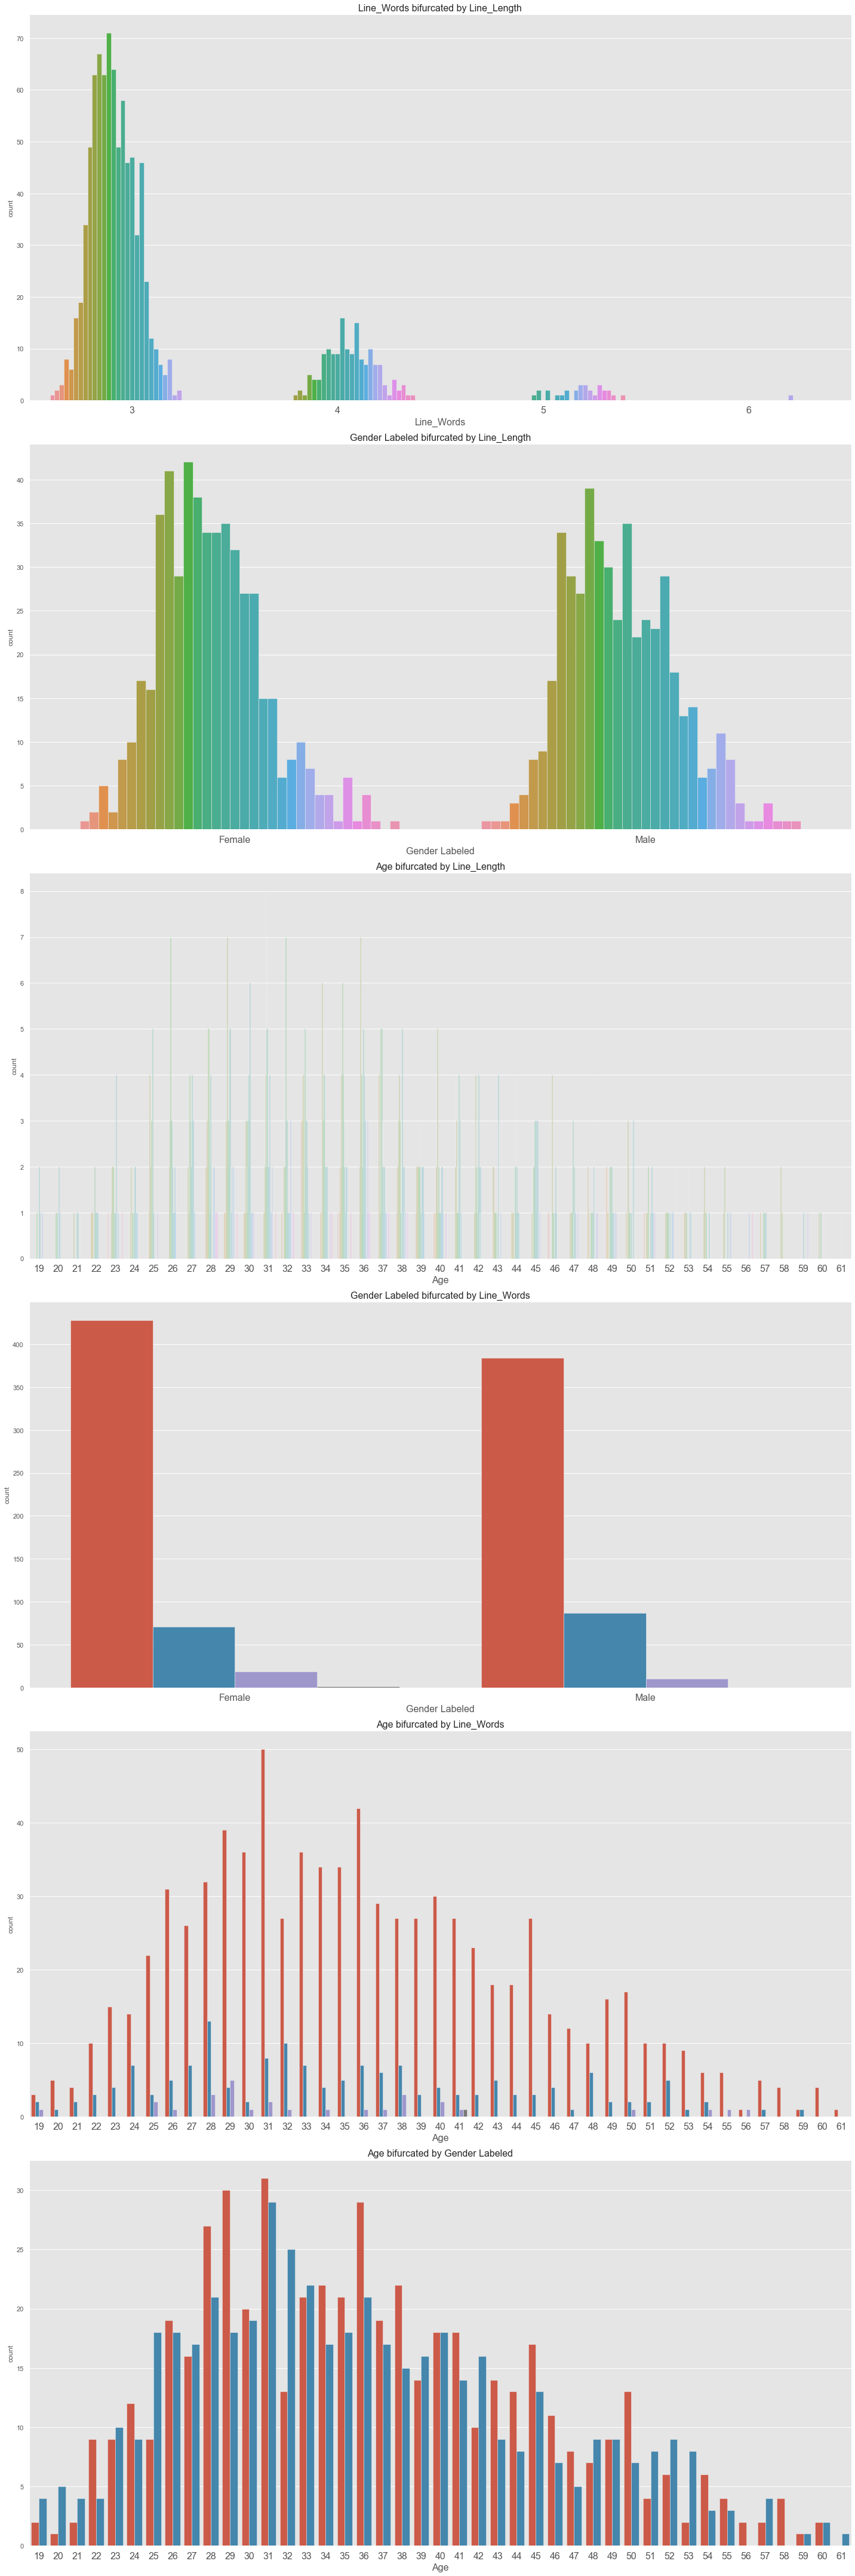

In [398]:
combos = itertools.combinations(['Line_Length', 'Line_Words', 'Gender Labeled', 'Age'], 2)

fig1 = plt.figure(1, figsize=(20, 60))
i = 0

for pair in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
    
    sns.countplot(x=df[pair[1]], hue=df[pair[0]])
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}', fontsize=fontsize)
    ax.set_xlabel(pair[1], fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    ax.get_legend().remove()
    plt.tight_layout()

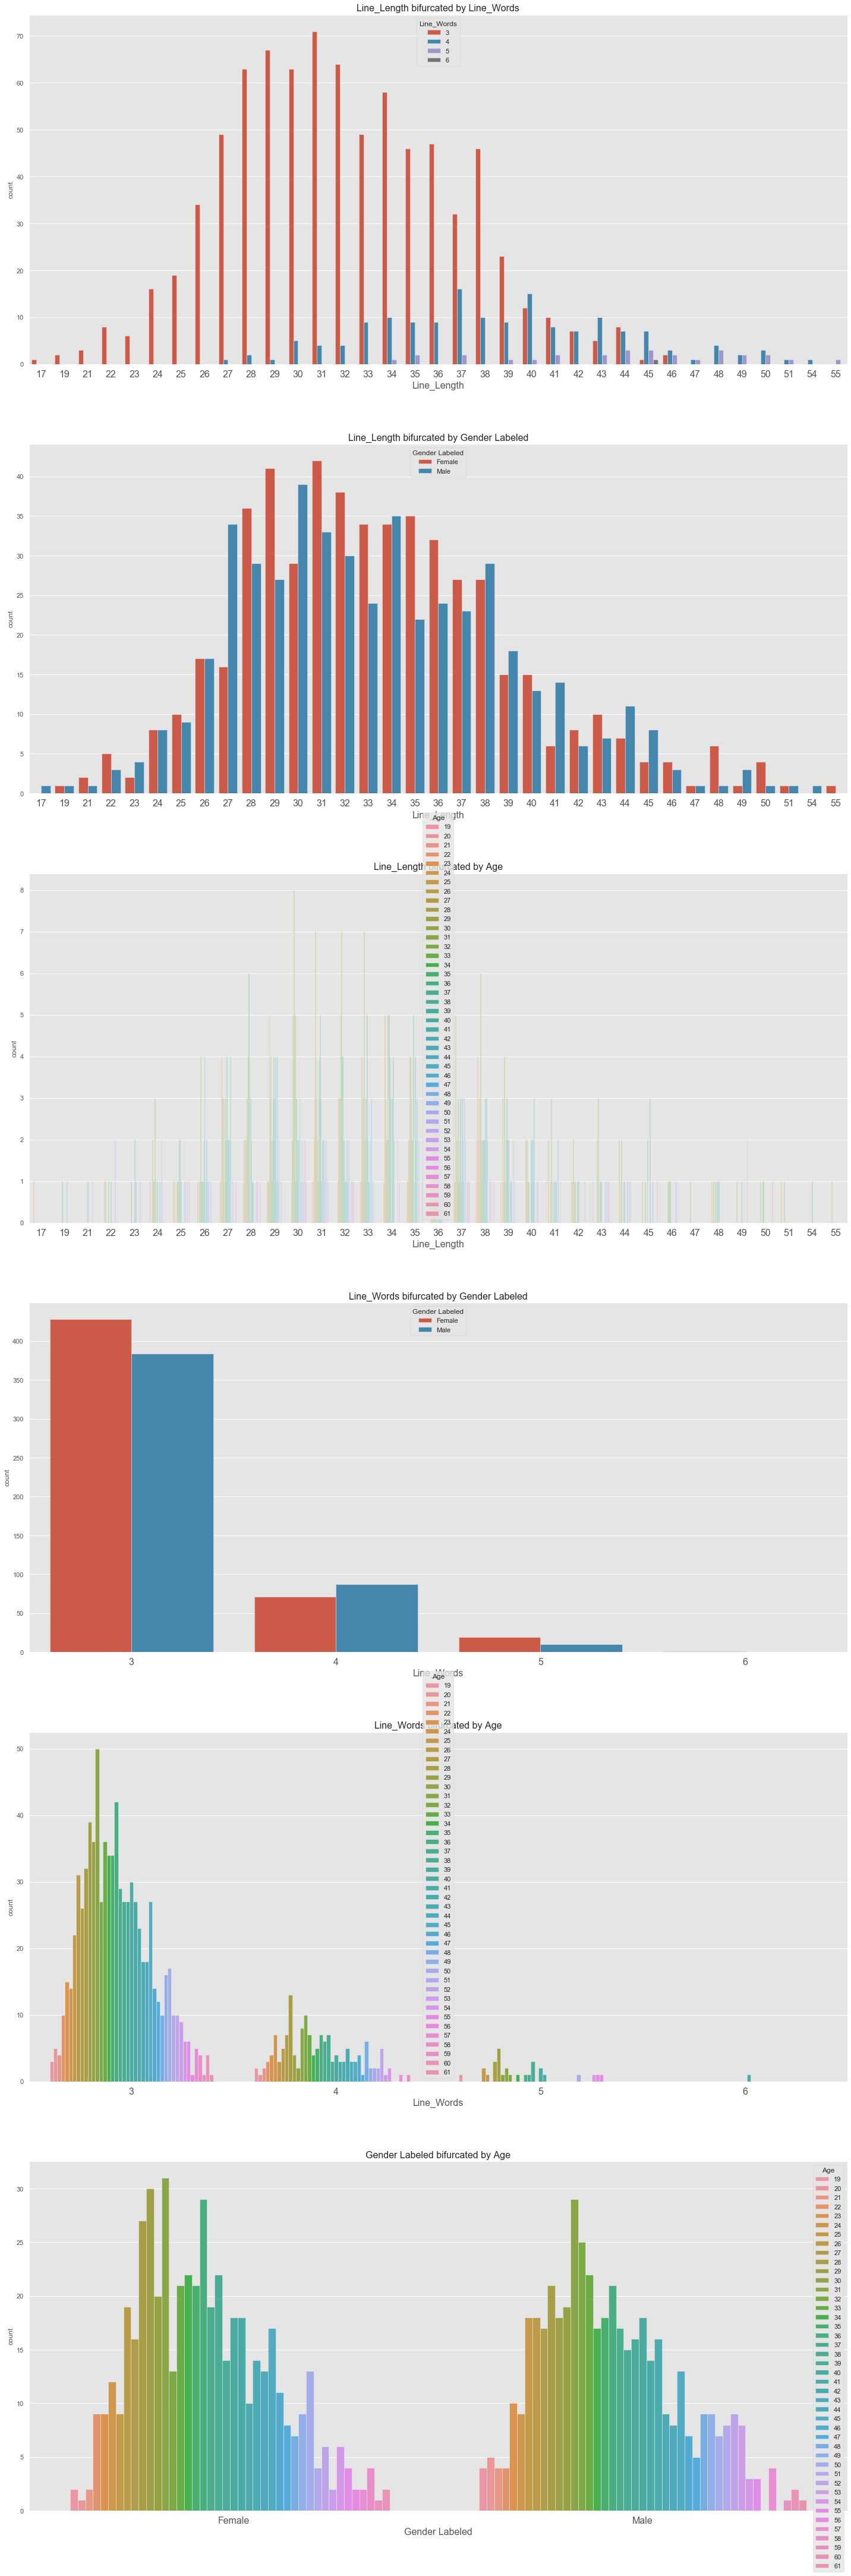

In [399]:
combos = itertools.combinations(['Line_Length', 'Line_Words', 'Gender Labeled', 'Age'], 2)

fig1 = plt.figure(1, figsize=(20, 60))
i = 0

for pair in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
    
    sns.countplot(x=df[pair[0]], hue=df[pair[1]])
    ax.set_title(f'{pair[0]} bifurcated by {pair[1]}', fontsize=fontsize)
    ax.set_xlabel(pair[0], fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    plt.tight_layout()

# Numerical Analysis

In [400]:
df_nums.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000
mean,65.000200,55000.000080,180.000100
std,15.853615,13414.634022,43.902339
min,32.600000,13996.500000,104.780000
25%,51.360000,47031.802500,138.830000
50%,68.215000,57012.300000,183.130000
75%,78.547500,65470.635000,218.792500
max,91.430000,79484.800000,269.960000


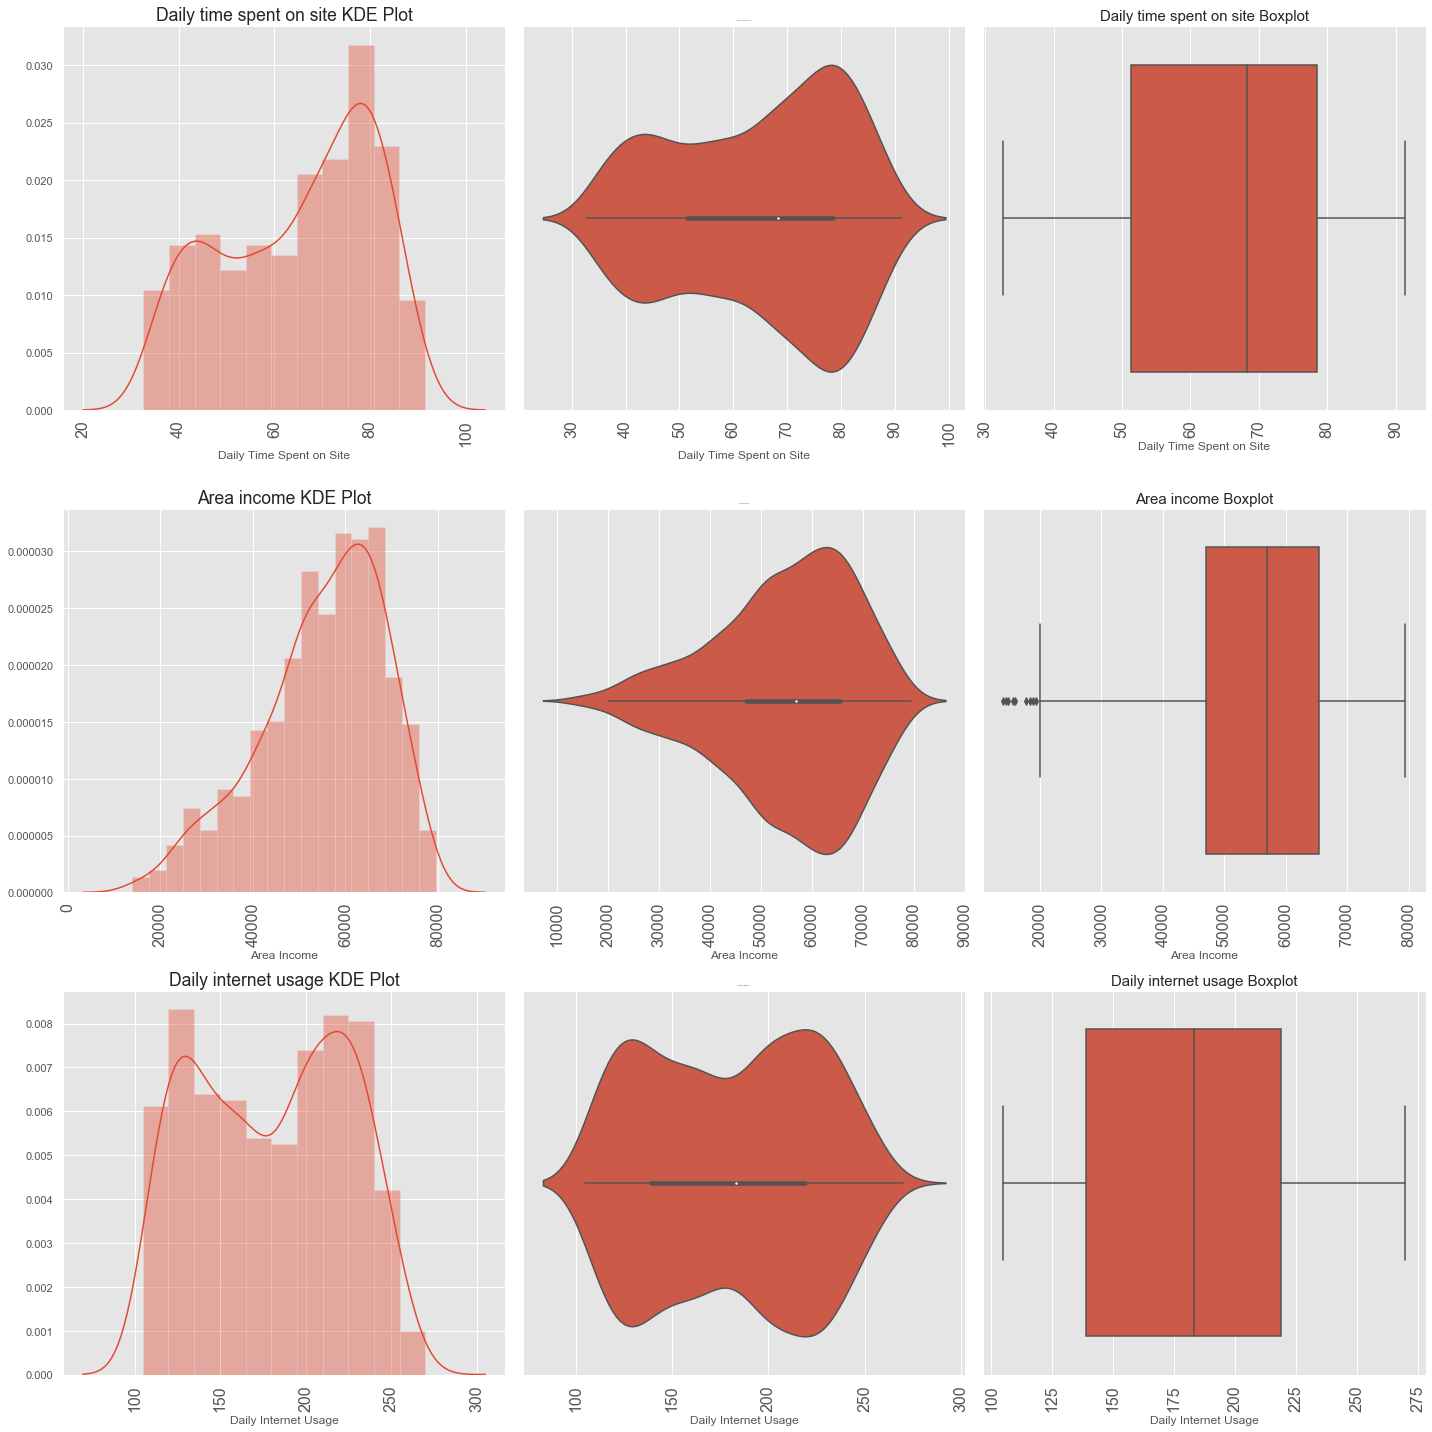

In [401]:
fig2 = plt.figure(1, figsize=(20, 20))
i = 0

for num in nums:
    i += 1
    ax = plt.subplot(len(nums), 3, i)
    sns.distplot(df[num])
    ax.set_title(f'{num.capitalize()} KDE Plot', fontsize=17.5)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.tight_layout()
    
    i += 1
    ax2 = plt.subplot(len(nums), 3, i)
    sns.violinplot(df[num])
    ax2.set_title(f'{num.capitalize()} Violin Plot', fontsize=1)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.tight_layout()
    
    i += 1
    ax3 = plt.subplot(len(nums), 3, i)
    sns.boxplot(df[num])
    ax3.set_title(f'{num.capitalize()} Boxplot', fontsize=15)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.tight_layout()

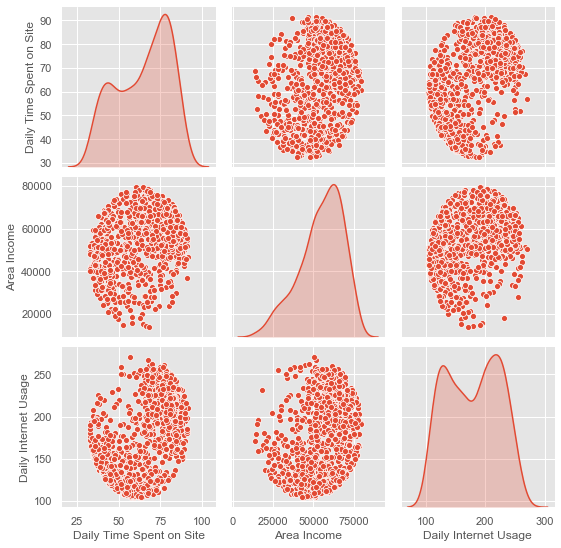

In [402]:
sns.pairplot(df_nums, diag_kind='kde', diag_kws=dict(shade=True))

### Numericals Bifurcated by Label

In [415]:
cats

['Gender Labeled', 'Line_Words', 'Line_Length', 'Age', 'Country']

In [416]:
combos = itertools.combinations(nums, 2)
cats.remove('Country')

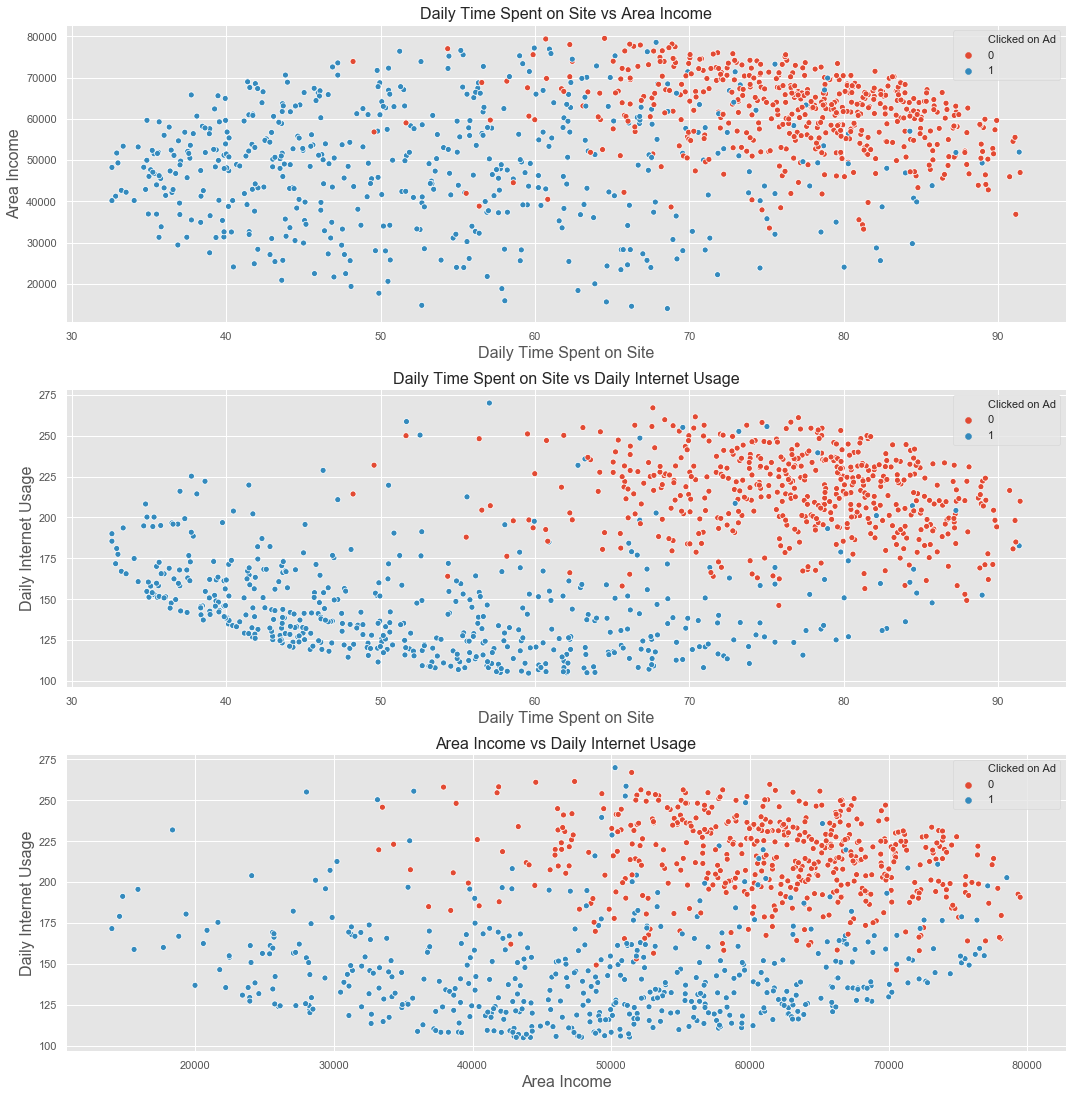

In [417]:
fig5 = plt.figure(1, figsize=(15, 30))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
#         ax = plt.subplot(24, 1, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Clicked on Ad'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    ax.set_ylabel(combo[1], fontsize=fontsize)
    plt.tight_layout()

# cats.extend(['Country'])

In [418]:
fig6 = plt.figure(1, figsize=(15, 30))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
#         ax = plt.subplot(24, 1, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Gender Labeled'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    ax.set_ylabel(combo[1], fontsize=fontsize)
    plt.tight_layout()

# cats.extend(['Country'])

<Figure size 1080x2160 with 0 Axes>

In [419]:
fig7 = plt.figure(1, figsize=(15, 30))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
#         ax = plt.subplot(24, 1, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Line_Words'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    ax.set_ylabel(combo[1], fontsize=fontsize)
    plt.tight_layout()

# cats.extend(['Country'])

<Figure size 1080x2160 with 0 Axes>

In [420]:
fig8 = plt.figure(1, figsize=(15, 30))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
#         ax = plt.subplot(24, 1, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Line_Length'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    ax.set_ylabel(combo[1], fontsize=fontsize)
    plt.tight_layout()

# cats.extend(['Country'])

<Figure size 1080x2160 with 0 Axes>

In [421]:
fig9 = plt.figure(1, figsize=(15, 30))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
#         ax = plt.subplot(24, 1, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Age'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    ax.set_ylabel(combo[1], fontsize=fontsize)
    plt.tight_layout()

cats.extend(['Country'])

<Figure size 1080x2160 with 0 Axes>

# Label Visualization

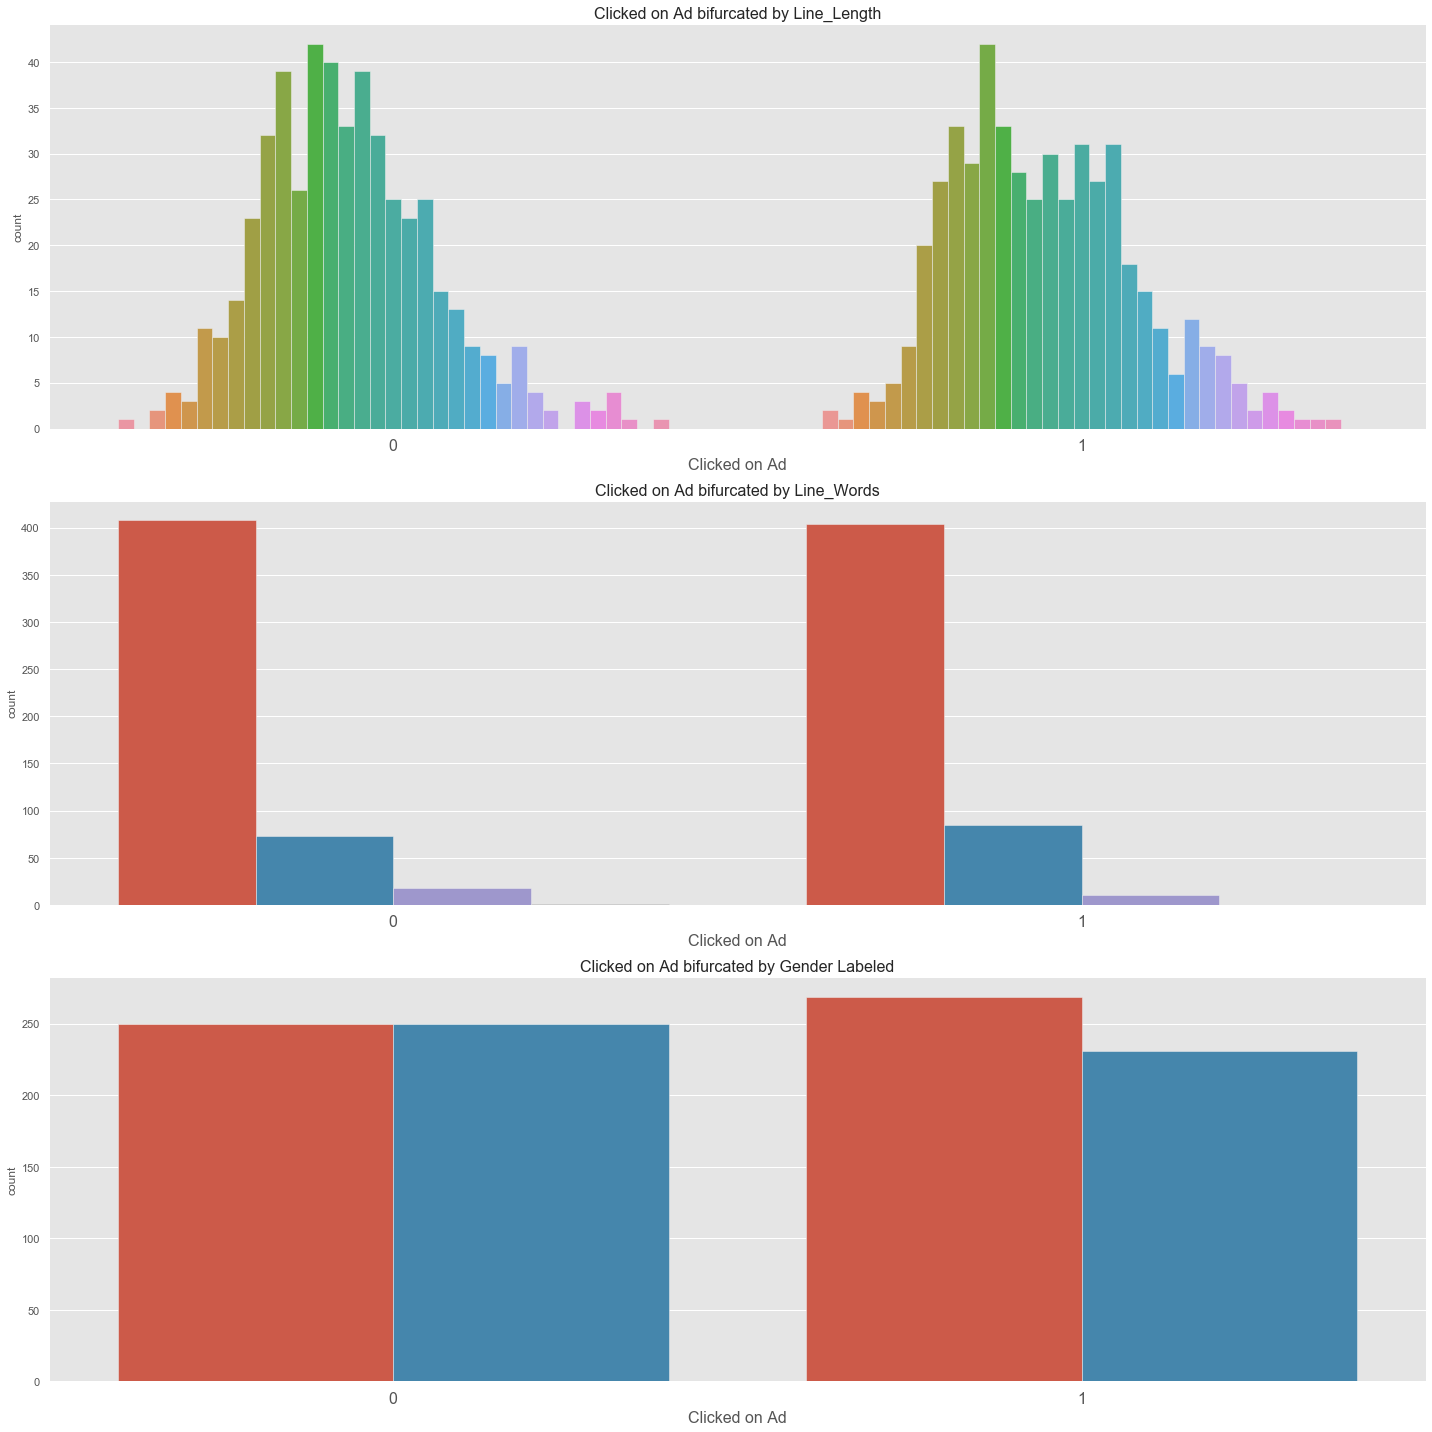

In [422]:
hues = ['Line_Length', 'Line_Words', 'Gender Labeled']
fig = plt.figure(1, figsize=(20, 20))
i = 0

for hue in hues:
    i += 1
    ax = plt.subplot(3, 1, i)
    
    sns.countplot(x=df['Clicked on Ad'], hue=df[hue])
    ax.set_title(f'Clicked on Ad bifurcated by {hue}', fontsize=fontsize)
    ax.set_xlabel('Clicked on Ad', fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    ax.get_legend().remove()
    plt.tight_layout()